In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)

In [4]:
X

array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       ...,
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ]])

In [5]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10204082, 0.10204082, 0.10204082, ..., 0.10204082, 0.10204082,
        0.10204082],
       [0.20408163, 0.20408163, 0.20408163, ..., 0.20408163, 0.20408163,
        0.20408163],
       ...,
       [4.79591837, 4.79591837, 4.79591837, ..., 4.79591837, 4.79591837,
        4.79591837],
       [4.89795918, 4.89795918, 4.89795918, ..., 4.89795918, 4.89795918,
        4.89795918],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [6]:
Z = f(X, Y)

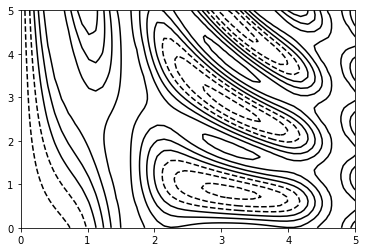

In [7]:
plt.contour(X, Y, Z, colors='black')

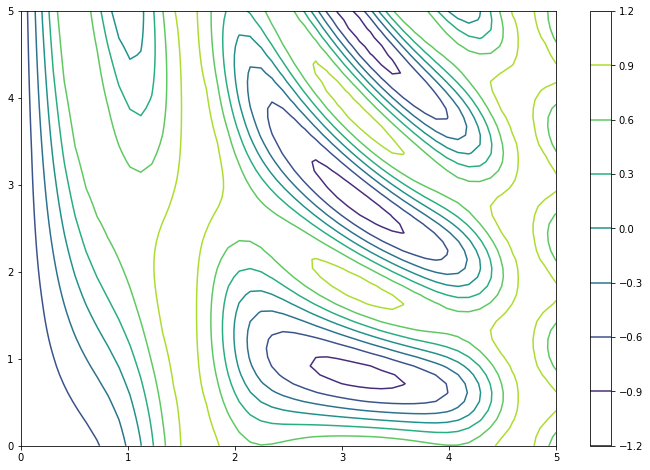

In [8]:
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z)
plt.colorbar()  

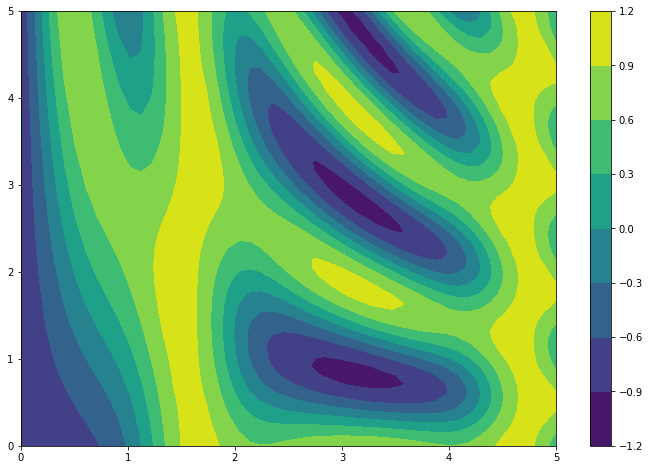

In [9]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z)
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

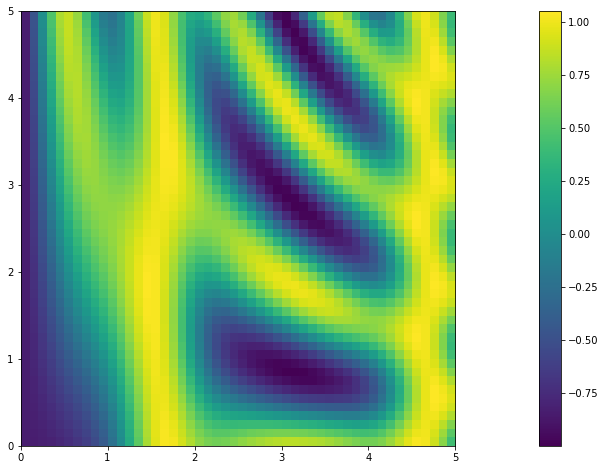

In [10]:
plt.figure(figsize=(12, 8))
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower')
plt.colorbar()
plt.axis('image')

/home/trierbo/miniconda2/envs/kaggle/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00427245, 0.00427245, 0.0085449 , 0.02136224, 0.03417959,
        0.11108367, 0.08972142, 0.14099081, 0.19226019, 0.22216733,
        0.24352958, 0.35461324, 0.36743059, 0.33752345, 0.48278671,
        0.36315814, 0.31616121, 0.24780203, 0.23498468, 0.1580806 ,
        0.15380815, 0.06408673, 0.06835918, 0.01708979, 0.01708979,
        0.00427245, 0.00427245, 0.00427245, 0.        , 0.00427245]),
 array([-3.18748572, -2.95342791, -2.7193701 , -2.48531229, -2.25125448,
        -2.01719667, -1.78313886, -1.54908104, -1.31502323, -1.08096542,
        -0.84690761, -0.6128498 , -0.37879199, -0.14473418,  0.08932364,
         0.32338145,  0.55743926,  0.79149707,  1.02555488,  1.25961269,
         1.49367051,  1.72772832,  1.96178613,  2.19584394,  2.42990175,
         2.66395956,  2.89801737,  3.13207519,  3.366133  ,  3.60019081,
         3.83424862]),
 <a list of 1 Patch objects>)

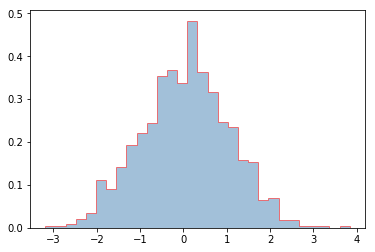

In [11]:
data = np.random.randn(1000)
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='red')

In [12]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

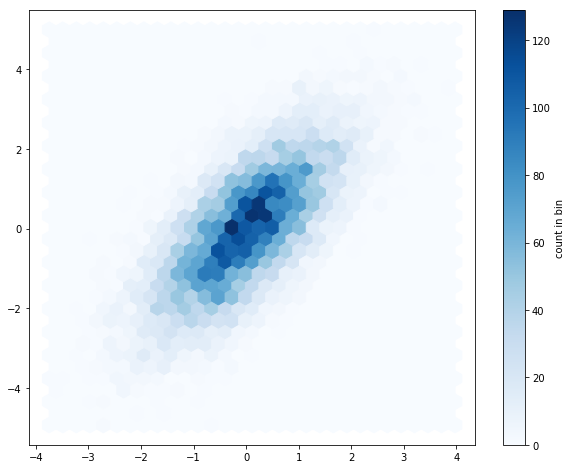

In [13]:
plt.figure(figsize=(10, 8))
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

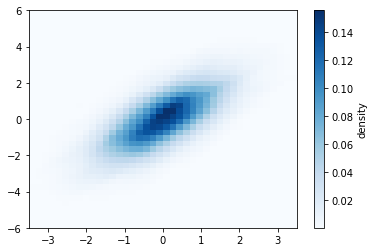

In [14]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

In [15]:
births = pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


1.36 * sig = quartiles[2] - quartiles[0]

In [16]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

In [17]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [18]:
births['day'] = births['day'].astype(int)

In [19]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [20]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

In [21]:
births.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [22]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])

In [23]:
births_by_date.unstack()

births                                                              \
          1         2         3         4         5         6         7    
1   4009.225  4247.400  4500.900  4571.350  4603.625  4668.150  4706.925   
2   4661.450  4743.025  4761.825  4760.825  4728.300  4678.100  4649.650   
3   4742.175  4750.550  4871.775  4821.550  4781.600  4721.875  4722.450   
4   4623.825  4743.825  4652.925  4679.525  4586.825  4642.850  4689.850   
5   4651.275  4616.700  4570.225  4577.000  4687.300  4678.950  4658.950   
6   4751.475  4804.650  4783.275  4744.475  4706.875  4771.850  4681.050   
7   5021.975  5021.450  4869.425  4335.325  4698.825  4984.500  5153.425   
8   5068.000  5008.525  5065.250  5087.950  5108.000  5110.925  5082.675   
9   4908.325  4982.000  5003.925  5013.400  4954.600  4955.000  4995.450   
10  5167.325  5103.625  5067.375  5005.175  5025.075  5048.100  5024.100   
11  4729.800  4727.150  4821.775  4849.400  4808.075  4758.475  4783.175   
12  4836.500  4830.300  4758.500  4718.725  4734.675  4683.050  4704.325   

                                    ...                                   \
          8         9         10    ...           22        23        24   
1   4629.650  4537.775  4591.700    ...     4742.800  4666.750  4653.200   
2   4668.525  4713.575  4800.850    ...     4751.525  4757.450  4829.000   
3   4718.225  4692.075  4785.375    ...     4667.200  4697.200  4725.050   
4   4712.025  4649.875  4610.675    ...     4686.700  4643.725  4581.150   
5   4623.750  4608.850  4623.175    ...     4713.500  4721.100  4689.125   
6   4681.950  4784.275  4831.375    ...     4795.625  4850.550  4897.525   
7   5159.800  5075.400  5041.300    ...     5135.675  5092.275  5036.050   
8   5153.575  5027.775  5083.375    ...     5058.850  5007.050  5035.200   
9   5165.475  5263.400  5214.500    ...     5316.825  5320.425  5284.050   
10  4989.875  4945.425  4975.975    ...     4810.250  4755.500  4758.775   
11  4752.750  4784.125  4836.300    ...     4601.900  4650.650  4647.125   
12  4803.800  4793.825  4785.325    ...     4661.925  4466.675  4126.250   

                                                                          
          25        26        27        28        29        30        31  
1   4698.000  4715.900  4747.025  4771.800  4702.300  4644.225  4598.275  
2   4857.025  4790.575  4693.750  4695.300  4623.400       NaN       NaN  
3   4773.650  4722.825  4680.850  4694.650  4665.025  4663.425  4723.250  
4   4602.250  4588.500  4571.950  4656.550  4613.250  4615.100       NaN  
5   4661.925  4657.750  4738.150  4671.650  4704.050  4601.175  4597.050  
6   4890.925  4853.975  4852.325  4862.975  4881.650  4981.600       NaN  
7   5029.325  4998.700  5070.250  5133.525  5151.900  5101.225  5045.275  
8   5107.675  5167.500  5124.700  5099.775  5062.000  5027.850  5048.650  
9   5240.000  5250.650  5190.150  5168.450  5218.825  5224.775       NaN  
10  4744.350  4788.050  4821.350  4826.100  4775.575  4745.050  4662.800  
11  4649.800  4587.250  4511.550  4590.775  4676.725  4765.475       NaN  
12  3844.450  4383.525  4850.150  5044.200  5120.150  5172.350  4859.200  

[12 rows x 31 columns]

In [24]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

In [25]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


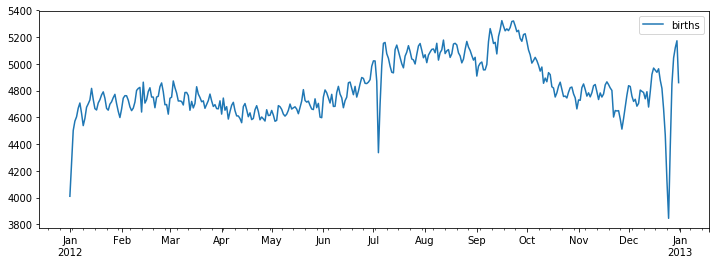

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

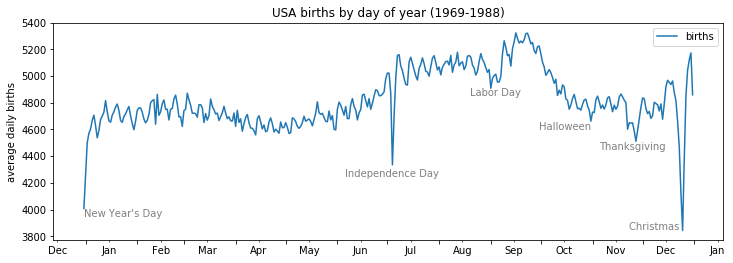

In [27]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.add_artist(mpl.text.Text('2012-12-25', 3850, "Christmas ", ha='right', **style))

ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))